# 32931 Technology Research Methods (SPRING 2019)
Quantitative Lab 1
(using PYTHON)

Compiled by Mahrita Harahap

# How to enter Questionnaire Data in Excel then read in Python

In our “Attitudes towards the Library” survey data there are four variables. We will be entering our data so that each row will represent a case (person) or questionnaire, and the columns will represent variables or questions. We will enter the data into Excel first and save the file as a .csv file named “Attitudes.csv”. For Question 1, the label Sex is a categorical variable with 2 categories. Question 2, Service is also a categorical variable with 5 categories. Question 3 is a numerical variable, Visits. Question 4 is a multiple response variable. The most efficient way to code this variable is to allocate a column for each of the five options in question 4. Within each column, we have a dichotomous variable – i.e. two possibilities only, Yes or No. Code Yes as 1 and No as 0 for each of these variables.

In [4]:
import pandas as pd

In [6]:
# Read data in Python
Attitudes=pd.read_csv('C:/Users/mahrita/Google Drive/UTS/32931 TRM/32931 Spring 2019/Week 1/Attitudes.csv')
Attitudes

,Sex,Service,Visits,ClosedReserve,StudyAreas,SearchFacilities,JournalCollections,Photocopiers
0,M,Agree,2,1,0,0,0,0
1,F,Strongly Agree,5,0,1,1,1,1
2,F,Agree,0,0,0,0,0,0
3,M,Neutral,1,1,1,1,0,1
4,F,Agree,3,0,1,1,0,1
5,F,Neutral,2,0,1,1,0,1
6,M,Disagree,1,0,0,0,1,1
7,M,Neutral,3,1,1,1,0,1
8,F,Neutral,4,1,1,1,0,1
9,F,Agree,2,0,1,0,1,1


Notice that Question 2 will have five Labels. You can label these as you choose, but there is a convention to order this categorical variable as this is an ordinal variable. Initially, the default in Python is to order them alphabetically. We would change the order so that Strongly Agree would be the most positive response, and Strongly Disagree is the least negative response. 

# Investigate each variable separately

For example: Question 2, Service, which is a categorical variable. We can produce frequency table using the groupby function, a pie chart using the plot(kind='pie') function and a bar chart using the plot(kind='bar') function in Python. What can you say using these displays?

In [10]:
# Frequency Table
Attitudes.groupby('Service')['Service'].count()

Service
Agree             4
Disagree          2
Neutral           5
Strongly Agree    1
Name: Service, dtype: int64

In [11]:
# Relative Frequency Table
Attitudes.groupby('Service')['Service'].count()/Attitudes.groupby('Service')['Service'].count().sum()

Service
Agree             0.333333
Disagree          0.166667
Neutral           0.416667
Strongly Agree    0.083333
Name: Service, dtype: float64

In [7]:
import matplotlib.pyplot as plt

In [9]:
Attitudes.Service

0              Agree
1     Strongly Agree
2              Agree
3            Neutral
4              Agree
5            Neutral
6           Disagree
7            Neutral
8            Neutral
9              Agree
10           Neutral
11          Disagree
Name: Service, dtype: object

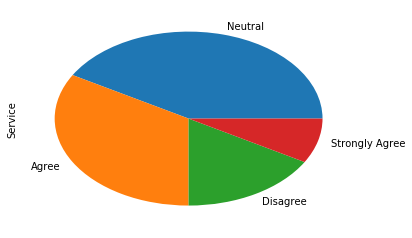

In [8]:
# Pie Chart
Attitudes.Service.value_counts().plot(kind='pie')
plt.show()

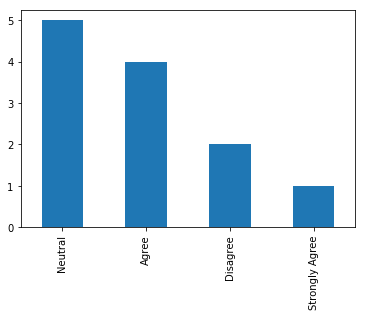

In [15]:
# Bar Chart 
Attitudes.Service.value_counts().plot(kind='bar')
plt.show()

We see that most people either agree or strongly agree. We also see that none of those people surveyed strongly disagreed with the statement.

How many percent of respondents strongly agreed that the library offers good service?
We can see that 8.3% selected “strongly agree”.

For Question 3, Visits, which is a quantitative variable, we can look at the summary statistics using the describe function, boxplot using the boxplot function and a histogram using the hist function in Python. Describe what you see.


In [16]:
#played time summary statistics
Attitudes['Visits'].describe()

count    12.000000
mean      2.166667
std       1.403459
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Visits, dtype: float64

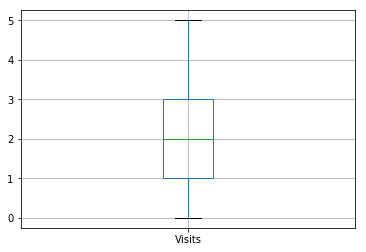

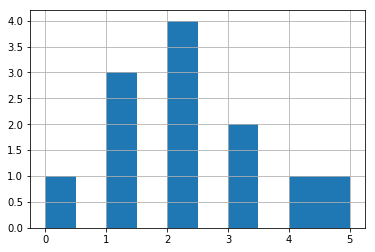

In [17]:
# Boxplot
pd.DataFrame(Attitudes['Visits']).boxplot()
plt.show()

# Histogram
Attitudes['Visits'].hist()
plt.show()


It appears that respondents visited the library between 0 and five times, with a mean of 2.17. The distribution of responses is reasonably symmetric (normally distributed).


Question 4 is a multiple response question. Produce a frequency chart and a pie graph for the multiple response question. What can you tell? What is the difference between Percent of Responses and Percent of Cases?


In [47]:
# Frequency Table
a=Attitudes[['ClosedReserve', 'StudyAreas','SearchFacilities','JournalCollections','Photocopiers']]
a.sum()

ClosedReserve          6
StudyAreas             7
SearchFacilities       7
JournalCollections     4
Photocopiers          10
dtype: int64

In [51]:
# percent out of responses
perc=a.sum()/34
perc

ClosedReserve         0.176471
StudyAreas            0.205882
SearchFacilities      0.205882
JournalCollections    0.117647
Photocopiers          0.294118
dtype: float64

In [54]:
# percent out of cases
a.sum()/11

ClosedReserve         0.545455
StudyAreas            0.636364
SearchFacilities      0.636364
JournalCollections    0.363636
Photocopiers          0.909091
dtype: float64

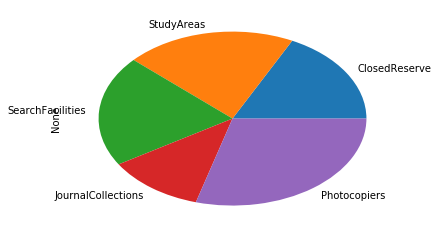

In [53]:
# Pie Chart
a.sum().plot(kind='pie')
plt.show()

Percent of responses refers to the proportion of selections (ticks) that were made for that feature (so number of selections for closed reserve ÷ total number of selections=6/34=17.6%). The percent of cases refers to the proportion of respondents that selected that particular feature (so number of selections for closed reserve ÷ total number of “valid” respondents=6/11).

# Investigate relationships between variables

We noticed from our investigation of Question 2 that two out of the twelve people in the survey disagreed with the statement “The library offers good service”. We might like to investigate whether there are any differences between the opinions of males and females. 

So we are looking at the relationship between two categorical variables: Service and Sex. We can produce a cross tabulation of these two categorical variables using the crosstab function. We can also produce a clustered bar graph to represent this relationship using the barplot function. Describe what you see in the crosstab and the graph.



In [99]:
df = Attitudes.groupby( [ 'Sex','Service'])
df.size()


Sex  Service       
F    Agree             3
     Neutral           2
     Strongly Agree    1
M    Agree             1
     Disagree          2
     Neutral           3
dtype: int64

In [100]:
df=pd.crosstab(Attitudes.Sex,Attitudes.Service)
df

Service,Agree,Disagree,Neutral,Strongly Agree
Sex,,,,
F,3,0,2,1
M,1,2,3,0


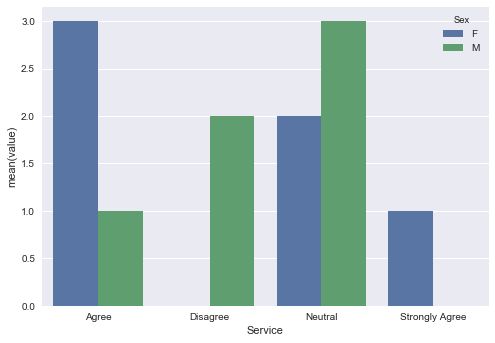

In [101]:
# Bar Chart 
import seaborn as sns
# now stack and reset
stacked = df.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked.Service, y=stacked.value, hue=stacked.Sex)
plt.show()

From our table and graph we can see that in general the females were more positive than the males, and that the two respondents who disagreed with the statement were males.  

# Selecting Cases (Selecting parts of a dataframe)

In many situations we would like to be able to select a subset of the data for analysis. For example, question 4 is only relevant if the respondent has visited the library in the last week. We might like to be able to produce tables and graphs based just on the people who did visit the library in the last week. We can select certain rows, based on logical tests on the values of one or more variables.


In [116]:
Attitudes.loc[Attitudes['Visits'] > 0] # To select the rows in which Visits>0

,Sex,Service,Visits,ClosedReserve,StudyAreas,SearchFacilities,JournalCollections,Photocopiers
0,M,Agree,2,1,0,0,0,0
1,F,Strongly Agree,5,0,1,1,1,1
3,M,Neutral,1,1,1,1,0,1
4,F,Agree,3,0,1,1,0,1
5,F,Neutral,2,0,1,1,0,1
6,M,Disagree,1,0,0,0,1,1
7,M,Neutral,3,1,1,1,0,1
8,F,Neutral,4,1,1,1,0,1
9,F,Agree,2,0,1,0,1,1
10,M,Neutral,2,1,0,1,0,1


In [114]:
Attitudes.loc[Attitudes['Visits'] == 2] # To select the rows in which Visits=2

,Sex,Service,Visits,ClosedReserve,StudyAreas,SearchFacilities,JournalCollections,Photocopiers
0,M,Agree,2,1,0,0,0,0
5,F,Neutral,2,0,1,1,0,1
9,F,Agree,2,0,1,0,1,1
10,M,Neutral,2,1,0,1,0,1


In [4]:
Attitudes.loc[:, ['Sex', 'Service']] # To select all the rows of the first two columns

,Sex,Service
0,M,Agree
1,F,Strongly Agree
2,F,Agree
3,M,Neutral
4,F,Agree
5,F,Neutral
6,M,Disagree
7,M,Neutral
8,F,Neutral
9,F,Agree


In [105]:
Attitudes[0:10] # To select the first 10 rows for all columns

,Sex,Service,Visits,ClosedReserve,StudyAreas,SearchFacilities,JournalCollections,Photocopiers
0,M,Agree,2,1,0,0,0,0
1,F,Strongly Agree,5,0,1,1,1,1
2,F,Agree,0,0,0,0,0,0
3,M,Neutral,1,1,1,1,0,1
4,F,Agree,3,0,1,1,0,1
5,F,Neutral,2,0,1,1,0,1
6,M,Disagree,1,0,0,0,1,1
7,M,Neutral,3,1,1,1,0,1
8,F,Neutral,4,1,1,1,0,1
9,F,Agree,2,0,1,0,1,1
